
# Project: Investigate a Dataset TMDB

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



### Brief Description



**Data Set Used :** TMDB Movie Data

**Data Source :** This Data set collected from the famous website https://www.themoviedb.org/ which has more than 10,000 movie
record.


## Questions :
 

1- are newer movies cost more than older movies?

2- is higher budget means high rating?

3- what is the voteing for most of the movies?

4- is vote count means higher vote average ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load Data .
df=pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# using info to get data type number of entries and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='Cleaning'></a>
## Data Cleaning 

> in this section i will start cleaning the data by droping cloumns that unnecessary , removing or filling Null values ,removing duplicates , changing data type.


**1- Drop Unnecessary Columns**

after forther investigation i found these columns are unnecessary and it will not add any useful information to my analysis:

- imdb_id
- homepage
- tagline
- keywords
- overview
- production_companies
- cast
- genres
- director


some of the above columns have null values and filling them with values will mislead my investigation.

**2- Null Values**

**3- Remove Duplicated Recoreds**

**4- Convert Objects to desired data Type.**

**1- Droping Columns.**

In [4]:
# Drop Unnecessary Columns

df.drop(['imdb_id', 'homepage', 'tagline', 'keywords','overview','production_companies','cast', 'genres', 'director'], axis=1, inplace=True)


In [5]:
# view df after Drop
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


**2- Null Values**

**In Order to get Accurate results we need to remove records with 0 value in Budget & Revenue .**

In [6]:
#Replacing 0 in budget and Revenue .
target_col = ['budget', 'revenue','budget_adj','revenue_adj']
df[target_col] = df[target_col].replace(0, np.NAN)


In [7]:
#Null Values 
df.isnull().sum().any()

True

**Now let's drop all recrds with Null Values.**

In [8]:
#Drop Raws With Null Values.
df.dropna(inplace=True)
Rows=len(df)
print('Now we have {} Row'.format(Rows))

Now we have 3855 Row


**3- Remove Duplicates**

In [9]:
#Remove Duplicated Recoreds 
# first let's check for dublicates

df.duplicated().sum()

1

In [10]:
# we have 1 record now let's drop the dublicated record and check if we still have or not.
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

**3- Convert Object to Correct DataType.**

In [11]:
#Now for the Final tuning we need to convert release_date data type object to Datetime.

df['release_date'] = df['release_date'].astype('datetime64[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3854 non-null   int64         
 1   popularity      3854 non-null   float64       
 2   budget          3854 non-null   float64       
 3   revenue         3854 non-null   float64       
 4   original_title  3854 non-null   object        
 5   runtime         3854 non-null   int64         
 6   release_date    3854 non-null   datetime64[ns]
 7   vote_count      3854 non-null   int64         
 8   vote_average    3854 non-null   float64       
 9   release_year    3854 non-null   int64         
 10  budget_adj      3854 non-null   float64       
 11  revenue_adj     3854 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 391.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis





#### functions needed for below Questions..

**This Function Get the Median of any Column**

In [13]:
def GetMedian(ColName):
    ColMedian = df[ColName].median()
    return ColMedian

**This Function select data range between Years**

In [14]:
def QueryByYear(YearMin,YearMax):
    QueryYears = df[df['release_year'].between(YearMin,YearMax)]
    return QueryYears

### 1- Are newer movies cost more than older movies ?

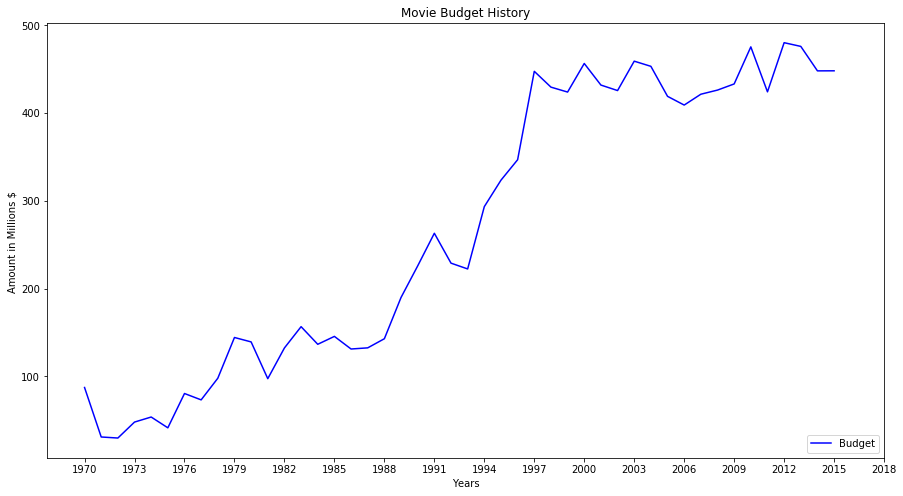

In [15]:
# budget new vs old movies 


# call function Query by Year with selected Years in parameters

UpdatedDF = QueryByYear(1970,2016) # we can select any year range and run again with different results

budget_year = UpdatedDF.groupby('release_year').mean()['budget']/1e5
plt.figure(figsize=(15, 8))
plt.plot(budget_year, color = 'b', label = 'Budget')
plt.xticks(np.arange(min(UpdatedDF['release_year']), max(UpdatedDF['release_year']+4),3.0))
plt.title('Movie Budget History')
plt.xlabel('Years')
plt.ylabel('Amount in Millions $ ')
plt.legend(loc='lower right');

This chart show Movies cost over the years. the Y axis show the amount in Hundreds of millions, start with 100 to 450 Million.

### 2- is higher budget means high rating?

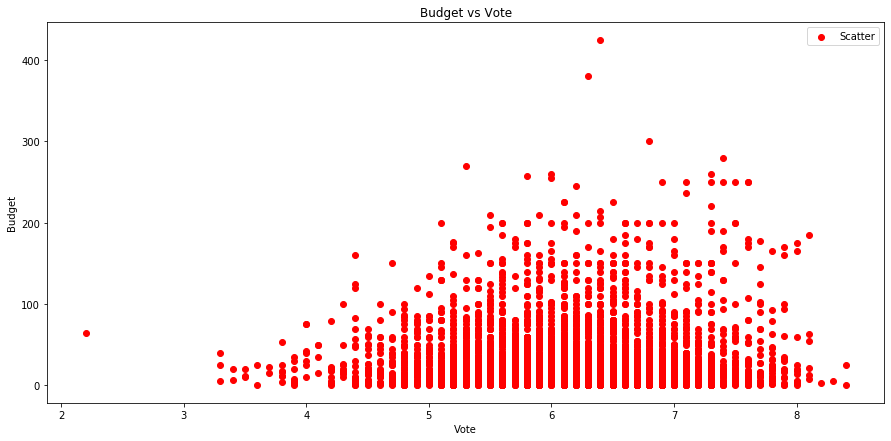

In [16]:
# is higher budget means high rating?

plt.figure(figsize=(15, 7))
plt.scatter(df['vote_average'],df['budget']/1e6, color = 'r', label = 'Scatter') # devide y axil by 1 milion
plt.ylabel('Budget')
plt.xlabel('Vote')
plt.title('Budget vs Vote')
plt.yscale('linear')
plt.legend(loc='upper right');

This Chart Show the Connection between Movie Vote And Budget. The Y axis show the budget in Hundreds of Millions starting from 0 to 400 Million.

### 3- what is the voteing for most of the movies ? 

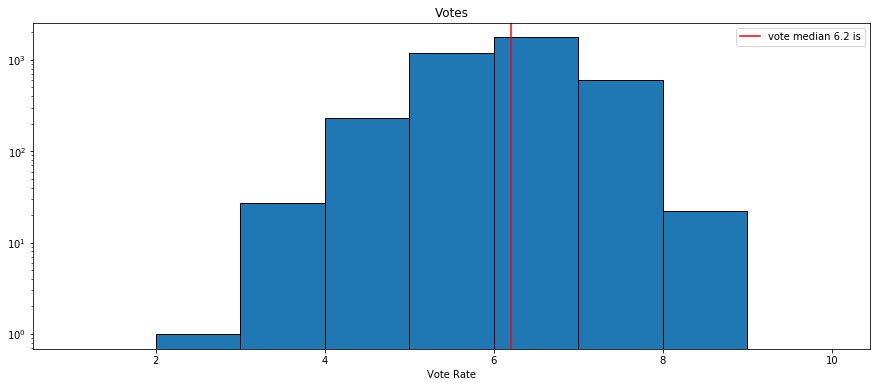

In [17]:
plt.figure(figsize=(15,6))

VoteAvMed = GetMedian('vote_average')# to be used below

bins=[1,2,3,4,5,6,7,8,9,10] # bins for the hist x 

plt.hist(df['vote_average'],bins=bins,edgecolor='black',log=True)

# the below line Adds a vertical line across the axes. VoteAvMed this is the vote average median 
plt.axvline(VoteAvMed,color='r',label='vote median {} is'.format(VoteAvMed)) 

plt.title('Votes')
plt.xlabel('Vote Rate')
plt.legend();


In this question i used Histogram Chart since i only have one variable and we can see the majorty of movie rating is between 5 and 7.

### 4- is vote count means higher vote average ?

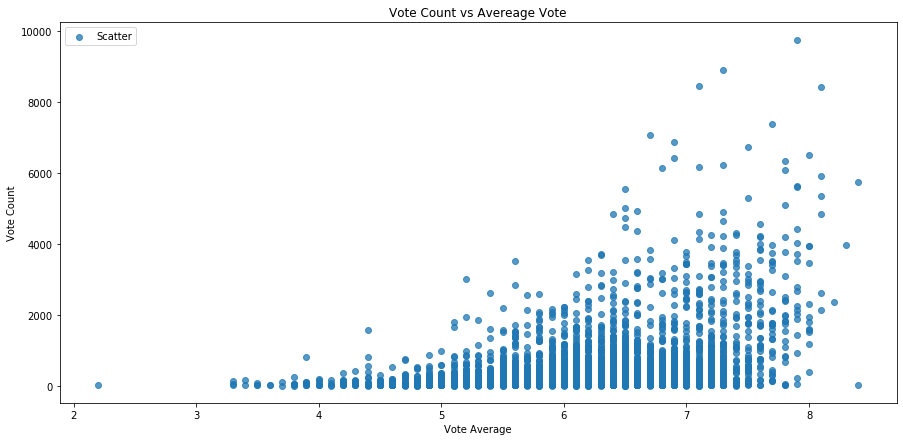

In [18]:
voteC = df['vote_count'] 
voteA = df['vote_average']

plt.figure(figsize=(15, 7))

plt.scatter(voteA,voteC,linewidths=1,alpha=0.75,label='Scatter')

plt.ylabel('Vote Count')
plt.xlabel('Vote Average')
plt.title('Vote Count vs Avereage Vote')

plt.legend(loc='upper left');

I used scatter plot for this chart to show the connection between vote avrege and vote count. as we can see most of the votes are below 2000.

<a id='conclusions'></a>
## Conclusions

Questions : 

1- are newer movies cost more than older movies? 

as we can see movies cost gross exponentially over the years. nowadays movie relays heavily on new technology and cinematic effects.


2- is higher budget means high rating?

for some yes, but mostly No , the data show alot of movies with high rating and low Budget. 

3- what is the voteing for most of the movies?

as seen in the chart most of the movie are rated between 5 to 7 , and the meadin is 6.2.

4- is vote count means higher vote average ?

as seen in the chart there is no correlation between vote count and vote avreage most of the movies have fewer vote count but higher rating.  


### Limitations

1- there is no clear rating system. the data set dosn't show what is the maximum rating.

2- the popularity column is not clear for me. there is no way to tell if this movie is popular or not, for example : there is only one movie above 30 and two movies above 20. i think popularity is real live data, this explain way only old movies have low popularity rate.

3- no column for best picture winners or nominees.

4- no column for the movie country. 

5- no colum for the movie language.